In [20]:
import keras

Apres  lecture  de  la  ressource  R2.1,  dessinez  une  architecture  type  d’un  CNN  à 
minimum 2 couches pour une image en entrée d’une taille de 32x32. Sur chaque 
couche notez les dimensions des tableaux et leur nom

- Input (32,32)  
- 1er couche convolution 2D, 32 filtre (padding same, activation relu) --> sortie (32, 32, 32)
- 1er couche MaxPooling 2D, taille fenetre (2x2) --> /2 dimension (16, 16, 32)
- 2nd couche convolution 2D, 64 filtre (padding same, activation relu) --> sortie (16, 16, 64)
- 2nd couche MaxPooling 2D --> sortie (8, 8, 64)
- couche Fatten --> vecteur de taille 8x8x64
- couche dense (10 neurones car 10 classes avec activation softmax) --> sortie vecteur taille 10

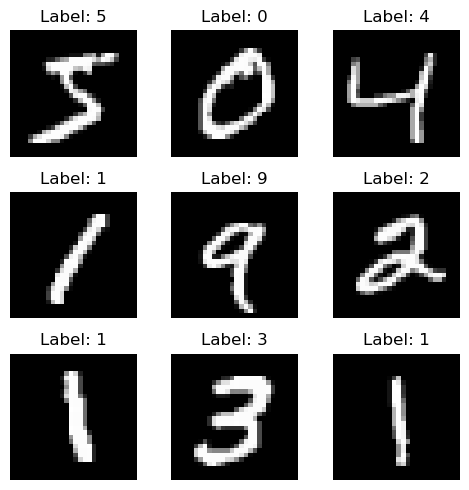

(60000, 784)


In [21]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

#Import du jeu de données
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Affichage d'un echantillon de la base
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#Préparation des données
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0 # --> pour normaliser les valeurs 0->255 à 0-->1
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train) # converti label 0-9 en ex: label 2 --> [0,0,1,0,0,0,0,0,0,0]
y_test = to_categorical(y_test)


print(X_train.shape)



In [22]:
#Création du modèle Neural Network simple (pas de convolution)
model_NN = Sequential()
model_NN.add(Input(shape=(784,)))
model_NN.add(Dense(10, activation='relu'))
model_NN.add(Dense(10,activation='softmax'))
model_NN.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_NN.summary()

#entrainement
model_NN.fit(X_train, y_train, epochs=10, validation_split=0.1)

#test sur X_test
_, test_acc = model_NN.evaluate(X_test, y_test)
print(test_acc)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.7355 - loss: 0.8642 - val_accuracy: 0.9265 - val_loss: 0.2570
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.9118 - loss: 0.3088 - val_accuracy: 0.9310 - val_loss: 0.2440
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.9197 - loss: 0.2764 - val_accuracy: 0.9350 - val_loss: 0.2292
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.9266 - loss: 0.2630 - val_accuracy: 0.9392 - val_loss: 0.2217
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.9263 - loss: 0.2512 - val_accuracy: 0.9415 - val_loss: 0.2170
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.9324 - loss: 0.2400 - val_accuracy: 0.9445 - val_loss: 0.2055
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.9320 - loss: 0.2411 - val_accuracy: 0.9425 - val_loss: 0.2017
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.9361 -

In [23]:
#Modèle + complexe avec plus de neurone sur le hidden layer 10->50
model_NN2 = Sequential()
model_NN2.add(Dense(50, input_dim=784, activation='relu'))
model_NN2.add(Dense(10, activation='softmax'))
model_NN2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_NN2.fit(X_train, y_train, epochs=10, validation_split=0.1)
_, test_acc = model_NN2.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10


c:\Users\llonc\anaconda3\envs\MLclean\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.8416 - loss: 0.5589 - val_accuracy: 0.9518 - val_loss: 0.1744
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.9468 - loss: 0.1878 - val_accuracy: 0.9645 - val_loss: 0.1228
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.9626 - loss: 0.1295 - val_accuracy: 0.9658 - val_loss: 0.1153
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.9698 - loss: 0.1010 - val_accuracy: 0.9698 - val_loss: 0.1071
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.9751 - loss: 0.0800 - val_accuracy: 0.9728 - val_loss: 0.0945
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.9811 - loss: 0.0641 - val_accuracy: 0.9722 - val_loss: 0.0912
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.9831 - loss: 0.0579 - val_accuracy: 0.9727 - val_loss: 0.0907
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9859 - loss: 0.04

In [24]:
#Modèle + complexe avec une couche en plus
model_NN3 = Sequential()
model_NN3.add(Dense(50, input_dim=784, activation='relu'))
model_NN3.add(Dense(50, activation='relu'))
model_NN3.add(Dense(10, activation='softmax'))
model_NN3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_NN3.fit(X_train, y_train, epochs=10, validation_split=0.1)
model_NN2.fit(X_train, y_train, epochs=10, validation_split=0.1)
_, test_acc = model_NN3.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.8305 - loss: 0.5659 - val_accuracy: 0.9562 - val_loss: 0.1534
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.9525 - loss: 0.1586 - val_accuracy: 0.9688 - val_loss: 0.1107
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.9641 - loss: 0.1163 - val_accuracy: 0.9702 - val_loss: 0.1028
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.9737 - loss: 0.0867 - val_accuracy: 0.9720 - val_loss: 0.0969
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.9778 - loss: 0.0722 - val_accuracy: 0.9737 - val_loss: 0.0869
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.9808 - loss: 0.0594 - val_accuracy: 0.9752 - val_loss: 0.0902
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - accuracy: 0.9837 - loss: 0.0506 - val_accuracy: 0.9710 - val_loss: 0.0970
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - accuracy: 0.9864 -

In [25]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:,:,:,np.newaxis] / 255.0
X_test = X_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Rq: le np.newaxis est necessaire car le CNN s'attendra a obtenir des images du format (N, hauteur, largeur, canaux) avec N nb de test input
#ici image en NB donc 1 seul canaux (N, hauteur, largeur) --> il faut le convertir via ajout new axe en (N, hauteur, largeur, 1)

In [26]:
# Modele CNN simple avec une couche Conv2D + MaxPooling
model_CNN1 = Sequential()
model_CNN1.add(Input(shape=(28,28,1)))
model_CNN1.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model_CNN1.add(MaxPooling2D(pool_size=2))
model_CNN1.add(Flatten())
model_CNN1.add(Dense(10, activation='softmax'))
model_CNN1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,770 (491.29 KB)

 Trainable params: 125,770 (491.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model_CNN1.fit(X_train, y_train, epochs=10, validation_split=0.1)
_, test_acc = model_CNN1.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8780 - loss: 0.4313 - val_accuracy: 0.9762 - val_loss: 0.0894
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9704 - loss: 0.1032 - val_accuracy: 0.9787 - val_loss: 0.0758
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9785 - loss: 0.0744 - val_accuracy: 0.9810 - val_loss: 0.0703
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9815 - loss: 0.0602 - val_accuracy: 0.9822 - val_loss: 0.0650
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0501 - val_accuracy: 0.9820 - val_loss: 0.0665
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0435 - val_accuracy: 0.9830 - val_loss: 0.0626
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9893 - loss: 0.0364 - val_accuracy: 0.9820 - val_loss: 0.0637
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9914 - loss: 0.0298 - 

In [30]:
num_classes = 10
input_shape = (28,28,1)
#empiriquement on multiplie par 2 la valeur de Conv2D d'un Conv2D à un autre
#empiriquement on fait deux couches denses de meme taille (à test avec une seule)

#Rajout d'une couche Conv2D + MaxPooling

model_CNN2 = Sequential([
    Input(shape=input_shape), #(28,28,1)
    Conv2D(32,kernel_size= (3,3) , padding='same', activation='relu'), # (28, 28, 32) car 32 filtre
    MaxPooling2D(pool_size=(2,2)), # (14, 14, 32) /2 les dimensions à cause de la taille de notre fenetre en 2,2
    Conv2D(64,kernel_size= (3,3), padding='same', activation='relu'), #(14, 14, 64)
    MaxPooling2D(pool_size=(2,2)), #  (7,7,64)
    Flatten(), # (37*7*64 --> 3136) pour convertir nos données en vecteur (flatten crée une couche avec autant de neurone que d'élément ds l'image) pour la couche dense (un element de vecteur = un neurone, )
    # Dense(num_classes, activation = 'relu'),
    Dense(num_classes, activation='softmax')# (10) couche fully connected qui doit avoir autant de neurone que de classe à détecter
])

model_CNN2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN2.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model_CNN2.fit(X_train, y_train, epochs=20, validation_split=0.1,batch_size = 64, callbacks=[early_stopping])
_, test_acc = model_CNN2.evaluate(X_test, y_test)
print(test_acc)



Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 50,186 (196.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8656 - loss: 0.4489 - val_accuracy: 0.9823 - val_loss: 0.0649
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9810 - loss: 0.0626 - val_accuracy: 0.9873 - val_loss: 0.0460
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9846 - loss: 0.0460 - val_accuracy: 0.9878 - val_loss: 0.0403
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9890 - loss: 0.0352 - val_accuracy: 0.9898 - val_loss: 0.0418
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9903 - loss: 0.0292 - val_accuracy: 0.9910 - val_loss: 0.0355
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.9902 - val_loss: 0.0368
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9944 - loss: 0.0185 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.

In [31]:
num_classes = 10
input_shape = (28,28,1)
#empiriquement on multiplie par 2 la valeur de Conv2D d'un Conv2D à un autre
#empiriquement on fait deux couches denses de meme taille (à test avec une seule)

#Rajout d'une couche entierement connectée
model_CNN3 = Sequential([
    Input(shape=input_shape), #(28,28,1)
    Conv2D(32,kernel_size= (3,3) , padding='same', activation='relu'), # (28, 28, 32) car 32 filtre
    MaxPooling2D(pool_size=(2,2)), # (14, 14, 32) /2 les dimensions à cause de la taille de notre fenetre en 2,2
    Conv2D(64,kernel_size= (3,3), padding='same', activation='relu'), #(14, 14, 64)
    MaxPooling2D(pool_size=(2,2)), #  (7,7,64)
    Flatten(), # (37*7*64 --> 3136) pour convertir nos données en vecteur (flatten crée une couche avec autant de neurone que d'élément ds l'image) pour la couche dense (un element de vecteur = un neurone, )
    Dense(10, activation = 'relu'),
    Dense(num_classes, activation='softmax')# (10) couche fully connected qui doit avoir autant de neurone que de classe à détecter
])

model_CNN3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN3.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model_CNN3.fit(X_train, y_train, epochs=20, validation_split=0.1,batch_size = 64, callbacks=[early_stopping])
_, test_acc = model_CNN3.evaluate(X_test, y_test)
print(test_acc)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │        31,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,296 (196.47 KB)

 Trainable params: 50,296 (196.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7295 - loss: 0.8506 - val_accuracy: 0.9598 - val_loss: 0.1286
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9619 - loss: 0.1258 - val_accuracy: 0.9743 - val_loss: 0.0890
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9740 - loss: 0.0867 - val_accuracy: 0.9790 - val_loss: 0.0700
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9789 - loss: 0.0702 - val_accuracy: 0.9823 - val_loss: 0.0649
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9821 - loss: 0.0583 - val_accuracy: 0.9852 - val_loss: 0.0560
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9863 - loss: 0.0452 - val_accuracy: 0.9860 - val_loss: 0.0533
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9888 - loss: 0.0387 - val_accuracy: 0.9850 - val_loss: 0.0567
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0325 - val_accuracy: 0.

In [ ]:
num_classes = 10
input_shape = (28,28,1)
#empiriquement on multiplie par 2 la valeur de Conv2D d'un Conv2D à un autre
#empiriquement on fait deux couches denses de meme taille (à test avec une seule)

#Upgrade le nombre de neurone de la couche dense rajoutée
model_CNN3_bis = Sequential([
    Input(shape=input_shape), #(28,28,1)
    Conv2D(32,kernel_size= (3,3) , padding='same', activation='relu'), # (28, 28, 32) car 32 filtre
    MaxPooling2D(pool_size=(2,2)), # (14, 14, 32) /2 les dimensions à cause de la taille de notre fenetre en 2,2
    Conv2D(64,kernel_size= (3,3), padding='same', activation='relu'), #(14, 14, 64)
    MaxPooling2D(pool_size=(2,2)), #  (7,7,64)
    Flatten(), # (37*7*64 --> 3136) pour convertir nos données en vecteur (flatten crée une couche avec autant de neurone que d'élément ds l'image) pour la couche dense (un element de vecteur = un neurone, )
    Dense(40, activation = 'relu'),
    Dense(num_classes, activation='softmax')# (10) couche fully connected qui doit avoir autant de neurone que de classe à détecter
])

model_CNN3_bis.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN3_bis.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model_CNN3_bis.fit(X_train, y_train, epochs=20, validation_split=0.1,batch_size = 64, callbacks=[early_stopping])
_, test_acc = model_CNN3_bis.evaluate(X_test, y_test)
print(test_acc)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 40)             │       125,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,706 (565.26 KB)

 Trainable params: 144,706 (565.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8596 - loss: 0.4442 - val_accuracy: 0.9825 - val_loss: 0.0619
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.0581 - val_accuracy: 0.9827 - val_loss: 0.0500
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9874 - loss: 0.0405 - val_accuracy: 0.9867 - val_loss: 0.0478
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9908 - loss: 0.0291 - val_accuracy: 0.9895 - val_loss: 0.0351
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9938 - loss: 0.0214 - val_accuracy: 0.9903 - val_loss: 0.0341
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9945 - loss: 0.0167 - val_accuracy: 0.9877 - val_loss: 0.0457
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.9912 - val_loss: 0.0391
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.

In [ ]:
num_classes = 10
input_shape = (28,28,1)
#empiriquement on multiplie par 2 la valeur de Conv2D d'un Conv2D à un autre
#empiriquement on fait deux couches denses de meme taille (à test avec une seule)

#Rajout de couche dropout
model_CNN4 = Sequential([
    Input(shape=input_shape), #(28,28,1)
    Conv2D(32,kernel_size= (3,3) , padding='same', activation='relu'), # (28, 28, 32) car 32 filtre
    MaxPooling2D(pool_size=(2,2)), # (14, 14, 32) /2 les dimensions à cause de la taille de notre fenetre en 2,2
    Conv2D(64,kernel_size= (3,3), padding='same', activation='relu'), #(14, 14, 64)
    MaxPooling2D(pool_size=(2,2)), #  (7,7,64)
    Flatten(), # (37*7*64 --> 3136) pour convertir nos données en vecteur (flatten crée une couche avec autant de neurone que d'élément ds l'image) pour la couche dense (un element de vecteur = un neurone, )
    Dense(40, activation = 'relu'),
    Dense(num_classes, activation='softmax')# (10) couche fully connected qui doit avoir autant de neurone que de classe à détecter
])

model_CNN4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN4.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model_CNN4.fit(X_train, y_train, epochs=20, validation_split=0.1,batch_size = 64, callbacks=[early_stopping])
_, test_acc = model_CNN4.evaluate(X_test, y_test)
print(test_acc)